In [125]:

import pandas as pd
from matplotlib import pyplot as plt
# from nltk.tokenize import word_tokenize
# from nltk.stem import SnowballStemmer
# from nltk.corpus import stopwords
# from textblob import TextBlob

In [126]:
qf=pd.read_csv("C:\\Users\\Rishabh\\Downloads\\drug\\drugsComTrain_raw.csv")
pf=pd.read_csv("C:\\Users\\Rishabh\\Downloads\\drug\\drugsComTest_raw.csv")
df=pd.concat([qf,pf])
df.shape

(215063, 7)

In [127]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [128]:
def sentiment(df):
    df.loc[df.rating>=4,'sentiment']='neutral'
    df.loc[df.rating<4,'sentiment']='negative'
    df.loc[df.rating>=7,'sentiment']='positive'
    return df

In [129]:
df=sentiment(df)

In [130]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,positive


In [131]:
df=df.drop('rating',axis='columns')

In [132]:
df.head()

,uniqueID,drugName,condition,review,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",20-May-12,27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",27-Apr-10,192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",14-Dec-09,17,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",3-Nov-15,10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",27-Nov-16,37,positive


In [133]:
df.describe()

,uniqueID,usefulCount
count,215063.000000,215063.000000
mean,116039.364814,28.001004
std,67007.913366,36.346069
min,0.000000,0.000000
25%,58115.500000,6.000000
50%,115867.000000,16.000000
75%,173963.500000,36.000000
max,232291.000000,1291.000000


In [134]:
count=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
print('mising values ')
missing_data

mising values 


,count,percentage
condition,1194,0.555186
uniqueID,0,0.000000
drugName,0,0.000000
review,0,0.000000
date,0,0.000000
usefulCount,0,0.000000
sentiment,0,0.000000


In [135]:
without_na = df['condition'].dropna()
df[~df.index.isin(without_na.index)]

,uniqueID,drugName,condition,review,date,usefulCount,sentiment
54015,119374,Testosterone,NaN,"""I used Androgel for many years until my insur...",20-Aug-14,13,positive
54088,5218,Zonisamide,NaN,"""My Dr. put me on Zonegran for my migraines an...",6-Mar-11,9,positive
54194,123001,Ethinyl estradiol / norgestrel,NaN,"""ive gone thru about 15 different types of bcp...",23-Mar-08,43,positive
54279,104281,Ethinyl estradiol / levonorgestrel,NaN,"""I&#039;ve been on Seasonique for a little ove...",8-Sep-12,23,positive
54536,218357,Amoxicillin / clavulanate,NaN,"""Well I took augmentin for 5 days and I solved...",30-Jun-15,3,neutral
...,...,...,...,...,...,...,...
160468,117817,Multivitamin with minerals,NaN,"""Severe hives itching after taking for 6 months""",15-Nov-15,0,neutral
160500,657,Medroxyprogesterone,NaN,"""I am 18 and I have been using the shot for 8 ...",20-Nov-11,2,neutral
160689,104844,Ethinyl estradiol / levonorgestrel,NaN,"""I&#039;ve been on Loseasonique for about 2 we...",13-Apr-10,3,positive
160752,41252,Acetaminophen / oxycodone,NaN,"""This is my third day using this pain medicine...",13-Dec-10,4,positive


In [136]:
df.dropna(subset=['condition'], inplace=True)

In [137]:
count=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
print('mising values ')
missing_data

mising values 


,count,percentage
uniqueID,0,0.0
drugName,0,0.0
condition,0,0.0
review,0,0.0
date,0,0.0
usefulCount,0,0.0
sentiment,0,0.0


In [138]:
df.head()

,uniqueID,drugName,condition,review,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",20-May-12,27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",27-Apr-10,192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",14-Dec-09,17,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",3-Nov-15,10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",27-Nov-16,37,positive


In [139]:
a=len(df)
a

213869

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
l=LabelEncoder()

In [142]:
df['senti num']=l.fit_transform(df.sentiment)

In [143]:
df.head()

,uniqueID,drugName,condition,review,date,usefulCount,sentiment,senti num
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",20-May-12,27,positive,2
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",27-Apr-10,192,positive,2
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",14-Dec-09,17,neutral,1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",3-Nov-15,10,positive,2
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",27-Nov-16,37,positive,2


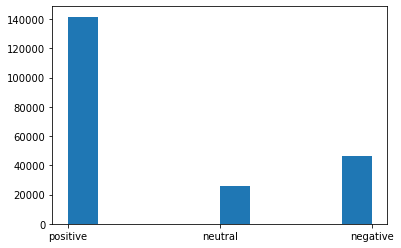

In [144]:
plt.hist(df.sentiment)
plt.show()

In [145]:
df=df.drop(['uniqueID','drugName','condition','date','usefulCount'],axis=1)

In [146]:
df.head()

,review,sentiment,senti num
0,"""It has no side effect, I take it in combinati...",positive,2
1,"""My son is halfway through his fourth week of ...",positive,2
2,"""I used to take another oral contraceptive, wh...",neutral,1
3,"""This is my first time using any form of birth...",positive,2
4,"""Suboxone has completely turned my life around...",positive,2


In [147]:
import re
import string

def text_clean(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_data=lambda x:text_clean(x)

In [148]:
df['clean_review']=pd.DataFrame(df.review.apply(clean_data))

In [149]:
df.head()

,review,sentiment,senti num,clean_review
0,"""It has no side effect, I take it in combinati...",positive,2,it has no side effect i take it in combination...
1,"""My son is halfway through his fourth week of ...",positive,2,my son is halfway through his fourth week of i...
2,"""I used to take another oral contraceptive, wh...",neutral,1,i used to take another oral contraceptive whic...
3,"""This is my first time using any form of birth...",positive,2,this is my first time using any form of birth ...
4,"""Suboxone has completely turned my life around...",positive,2,suboxone has completely turned my life around ...


In [150]:
# model training
x=df.clean_review
y=df.sentiment

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)


In [151]:
len(x_train)

192482

In [152]:
len(x_test)

21387

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [154]:
vect=TfidfVectorizer()
clf=LogisticRegression(solver='lbfgs')
from sklearn.pipeline import Pipeline

In [155]:
model=Pipeline([('vectorizer',vect),('classifier',clf)])

In [156]:
model.fit(x_train,y_train)

C:\Users\Rishabh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [157]:
from sklearn.metrics import confusion_matrix
prediction=model.predict(x_test)
confusion_matrix(prediction,y_test)

array([[ 3235,   705,   661],
       [  169,   373,   233],
       [ 1300,  1479, 13232]], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [159]:
print("Accuracy :",accuracy_score(prediction,y_test))
print("precision :",precision_score(prediction,y_test,average="weighted"))
print("recall :",recall_score(prediction,y_test,average="weighted"))

Accuracy : 0.7873942114368542
precision : 0.8544873506329238
recall : 0.7873942114368542


In [166]:
exam=[' medicine was great ']
result=model.predict(exam)


In [167]:
print(result)

['positive']


In [168]:
import pickle
pickle.dump(model,open('model24.pkl','wb'))